In [2]:
import scipy.io
import numpy as np

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection

mat1 = scipy.io.loadmat('X.mat')
mat2 = scipy.io.loadmat('Label.mat')
X = mat1['X']
Label = mat2['Label']
print(np.shape(X))
print(np.shape(Label))

(328, 779)
(328, 1)


In [3]:
# Seperate Test and Train!
X_train, X_test, y_train, y_test = train_test_split(X, Label, test_size=0.0)

In [4]:
Jvals = feature_selection.f_classif(X_train, y_train)
pvals = Jvals[1]
pvals = pvals[0:-9]
X = X[: ,0:-9]


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [770 771 772 773 774 775 776 777 778] are constant.
  UserWarning)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


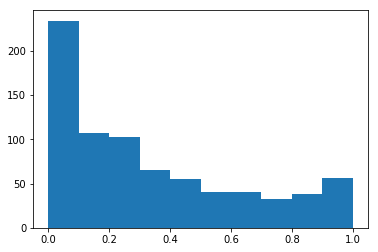

In [5]:
plt.figure()
plt.hist(pvals)
plt.show()

In [5]:
Y = X[:,  pvals<0.08]
np.shape(Y)


(328, 212)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

(array([1.03572169, 3.88395635, 4.91967805, 7.25005186, 4.14288678,
        5.17860847, 2.33037381, 2.07144339, 1.55358254, 1.81251296]),
 array([0.03033303, 0.05959092, 0.0888488 , 0.11810669, 0.14736458,
        0.17662247, 0.20588036, 0.23513825, 0.26439614, 0.29365403,
        0.32291192]),
 <a list of 10 Patch objects>)

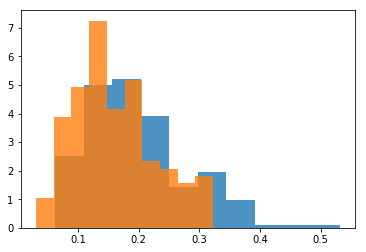

In [32]:
plt.figure()
plt.hist(Y[np.ravel(Label==1), 0], density=1, alpha=0.8)
plt.hist(Y[np.ravel(Label==0), 0], density=1, alpha=0.8)

In [ ]:
print('Starting Linear SVM!...')
clf = svm.SVC(kernel='linear')
clf.fit(Y, Label) 
print('Done!')
print('Prediction on Test Set!...')
score = cross_val_score(clf,X_train,y_train,cv=5)
print(np.mean(score))
print(np.std(score))
print('Done!')
print(score)


Starting Linear SVM!...


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print('\n')
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred.ravel())
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, y_pred))
# Method 2: RBF Soft SVM

print('Starting RBF SVM!...')
clf = svm.SVC(C= 1000000, gamma=0.00002, kernel='rbf')
clf.fit(X_train, y_train) 
print('Done!')
print('Prediction on Test Set!...')
y_pred = clf.predict(X_test)
print('Done!')

print('\n')
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, y_pred))


Starting RBF SVM!...
Done!
Prediction on Test Set!...
Done!


Confusion Matrix:
[[ 0 28]
 [ 0 54]]
Accuracy:
0.6585365853658537


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
# Method 3: kNN

print('Starting kNN...')
neigh = KNeighborsClassifier(n_neighbors=5, p=1)
neigh.fit(X_train, y_train)
print('Done!')
print('Prediction on Test Set!...')
y_pred = neigh.predict(X_test)
print('Done!')

print('\n')
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, y_pred))


Starting kNN...
Done!
Prediction on Test Set!...
Done!


Confusion Matrix:
[[18 12]
 [12 40]]
Accuracy:
0.7073170731707317


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [83]:

print('Starting MLP with ADAM Optimization Algorithm...')

clf = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 100, 100), activation='relu')
clf.fit(X_train, y_train)

print('Done!')
print('Prediction on Test Set!...')
y_pred = clf.predict(X_test)
print('Done!')

print('\n')
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:')
print(accuracy_score(y_test, y_pred))


Starting MLP with ADAM Optimization Algorithm...


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done!
Prediction on Test Set!...
Done!


Confusion Matrix:
[[24  6]
 [18 34]]
Accuracy:
0.7073170731707317
